In [1]:
import pandas as pa  
T = pa.DataFrame()  
T['Prix'] = [3.4, 3.6, 4, 5, 6.3, 6.7, 7, 8]
T['Ventes'] = [8.3, 8.1, 7, 5.5, 5.2, 4.8, 4.5, 4]

T

,Prix,Ventes
0,3.4,8.3
1,3.6,8.1
2,4.0,7.0
3,5.0,5.5
4,6.3,5.2
5,6.7,4.8
6,7.0,4.5
7,8.0,4.0


In [2]:
T.mean()

Prix      5.500
Ventes    5.925
dtype: float64

In [3]:
def moy(L):
    m=0
    for x in L:
        m = m + x
    return m / len(L)

In [4]:
moy(T['Prix']), moy(T['Ventes'])

(5.5, 5.925)

In [5]:
T.var(ddof=0)

Prix      2.637500
Ventes    2.404375
dtype: float64

In [7]:
def Var(L):
    return moy([(x - moy(L))**2 for x in L])
                

In [12]:
Var(T['Prix']), Var(T['Ventes'])

(2.6375, 2.404375)

# écart

In [13]:
T.std(ddof = 0)

Prix      1.624038
Ventes    1.550605
dtype: float64

In [14]:
def sigma(L):
    return Var(L)**0.5

In [21]:
T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\actions.csv')
T.head()

,Date,Carrefour,Renault
0,2020-06-19,0.0126,-0.0158
1,2020-06-22,0.0298,-0.0052
2,2020-06-23,0.0203,0.0640
3,2020-06-24,-0.0344,-0.0648
4,2020-06-25,-0.0024,0.0227


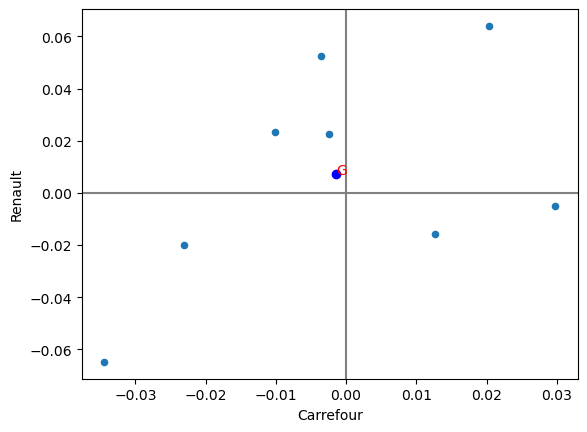

In [24]:
import pylab as pl

mx = T['Carrefour'].mean()
my = T['Renault'].mean()

# Create scatter plot
T.plot.scatter(x = 'Carrefour', y='Renault')


# Plot mean point G
pl.plot(mx, my, 'o',color='blue')
pl.text(mx, my, 'G', color='red')

# Add x and y axis to the plot
pl.axhline(y=0, color='gray')
pl.axvline(x=0, color='gray')


# écart moyenne

In [26]:
T['RX']= T['Carrefour'] - mx
T['RY']= T['Renault'] - my
T

,Date,Carrefour,Renault,RX,RY
0,2020-06-19,0.0126,-0.0158,0.013962,-0.0229
1,2020-06-22,0.0298,-0.0052,0.031162,-0.0123
2,2020-06-23,0.0203,0.0640,0.021662,0.0569
3,2020-06-24,-0.0344,-0.0648,-0.033037,-0.0719
4,2020-06-25,-0.0024,0.0227,-0.001037,0.0156
5,2020-06-26,-0.0231,-0.0199,-0.021737,-0.0270
6,2020-06-29,-0.0036,0.0525,-0.002237,0.0454
7,2020-06-30,-0.0101,0.0233,-0.008737,0.0162


In [27]:
T['RX*RY']= T['RX'] * T['RY']

T

,Date,Carrefour,Renault,RX,RY,RX*RY
0,2020-06-19,0.0126,-0.0158,0.013962,-0.0229,-0.000320
1,2020-06-22,0.0298,-0.0052,0.031162,-0.0123,-0.000383
2,2020-06-23,0.0203,0.0640,0.021662,0.0569,0.001233
3,2020-06-24,-0.0344,-0.0648,-0.033037,-0.0719,0.002375
4,2020-06-25,-0.0024,0.0227,-0.001037,0.0156,-0.000016
5,2020-06-26,-0.0231,-0.0199,-0.021737,-0.0270,0.000587
6,2020-06-29,-0.0036,0.0525,-0.002237,0.0454,-0.000102
7,2020-06-30,-0.0101,0.0233,-0.008737,0.0162,-0.000142


# covariance

In [28]:
T['RX*RY'].mean()

0.0004040687499999999

In [33]:
def cov(X,Y):
    mX = moy(X)
    mY = moy(Y)
    s=0
    for k in range(len(X)):
        s = s + (X[k] - mX) * (Y[k] - mY)
    return s / len(X)
